<a href="https://colab.research.google.com/github/Makuo67/GlucoAI/blob/main/DiabetesPredictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction



In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_validate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import joblib


from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Saving my model in Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/ML_models/diabetes_012_health_indicators_BRFSS2015.csv"

In [9]:
def load_data(path):
  return pd.read_csv(path)



In [10]:
df = load_data(path)
pd.set_option('display.max_columns', 500)

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
df.shape

(253680, 22)

# **Exploratory Data Analysis**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [13]:
# for cleaniness in further plots, all float types are converted to int
df = df.astype(int)
df['Diabetes_012'].value_counts()


Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [ ]:
# define a function to simplify the plots in further sections
def ida_plot(li_col, row, col=3, figsize=(20, 5), palette="Set2"):

    """
    This function return plt subplots by
    looping through the df columns
    display only the desired columns
    """

    # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axe = ax.ravel()

    # Define a color palette for the bar charts
    colors = sns.color_palette("Set2", len(li_col))

    # use for loop to plot
    for i in range(len(li_col)):

        # create bar charts for each column
        sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)

    # adjust the spacing of the subplots
    plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
    )

<ipython-input-13-241759e300d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diabetes_012', palette="Set2")


<Axes: xlabel='Diabetes_012', ylabel='count'>

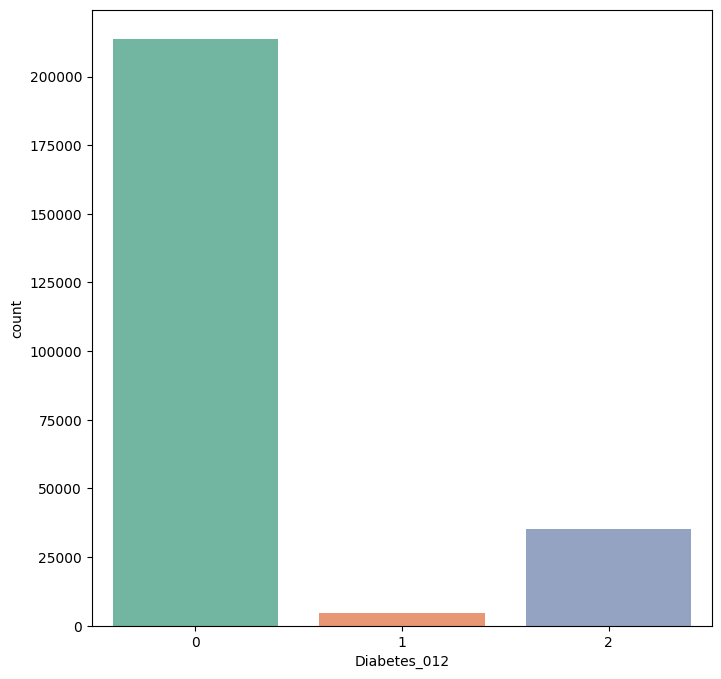

In [ ]:
# plot classes
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='Diabetes_012', palette="Set2")

### There are 3 classes in diabetes_binary, which is the target column.
### The distribution is clearly imbalanced with class 0 (No Diabetes) dominating among 3 classes.

<ipython-input-12-bcea7f6fee0c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)
<ipython-input-12-bcea7f6fee0c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)
<ipython-input-12-bcea7f6fee0c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)


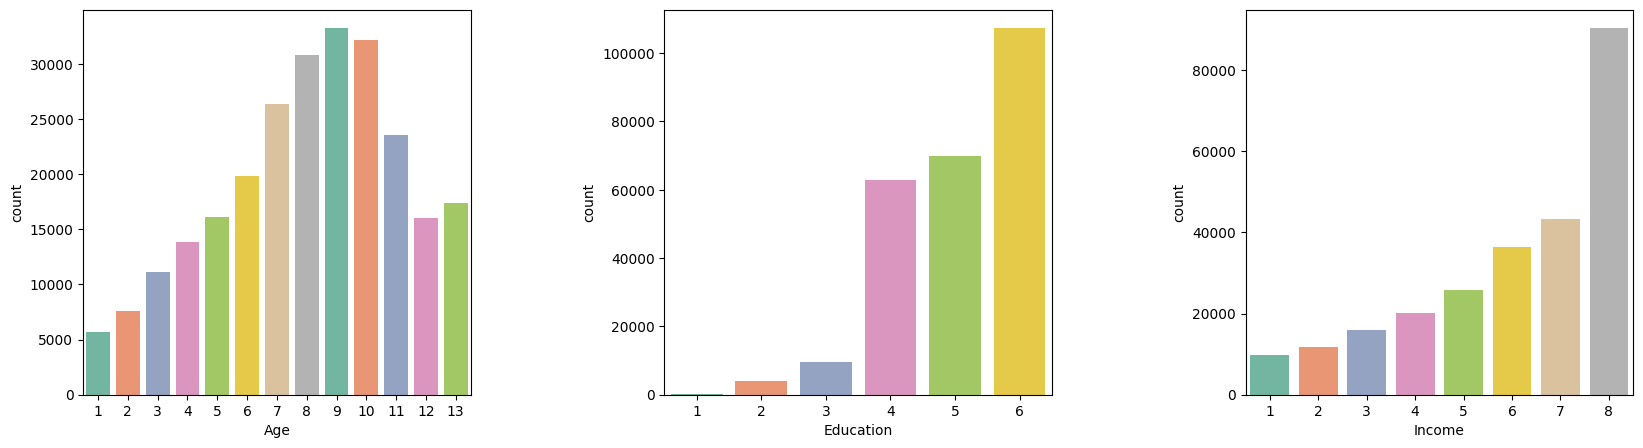

In [ ]:
ida_plot(['Age', 'Education', 'Income'], 1, 3)

<ipython-input-12-bcea7f6fee0c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)
<ipython-input-12-bcea7f6fee0c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)
<ipython-input-12-bcea7f6fee0c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)
<ipython-input-12-bcea7f6fee0c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

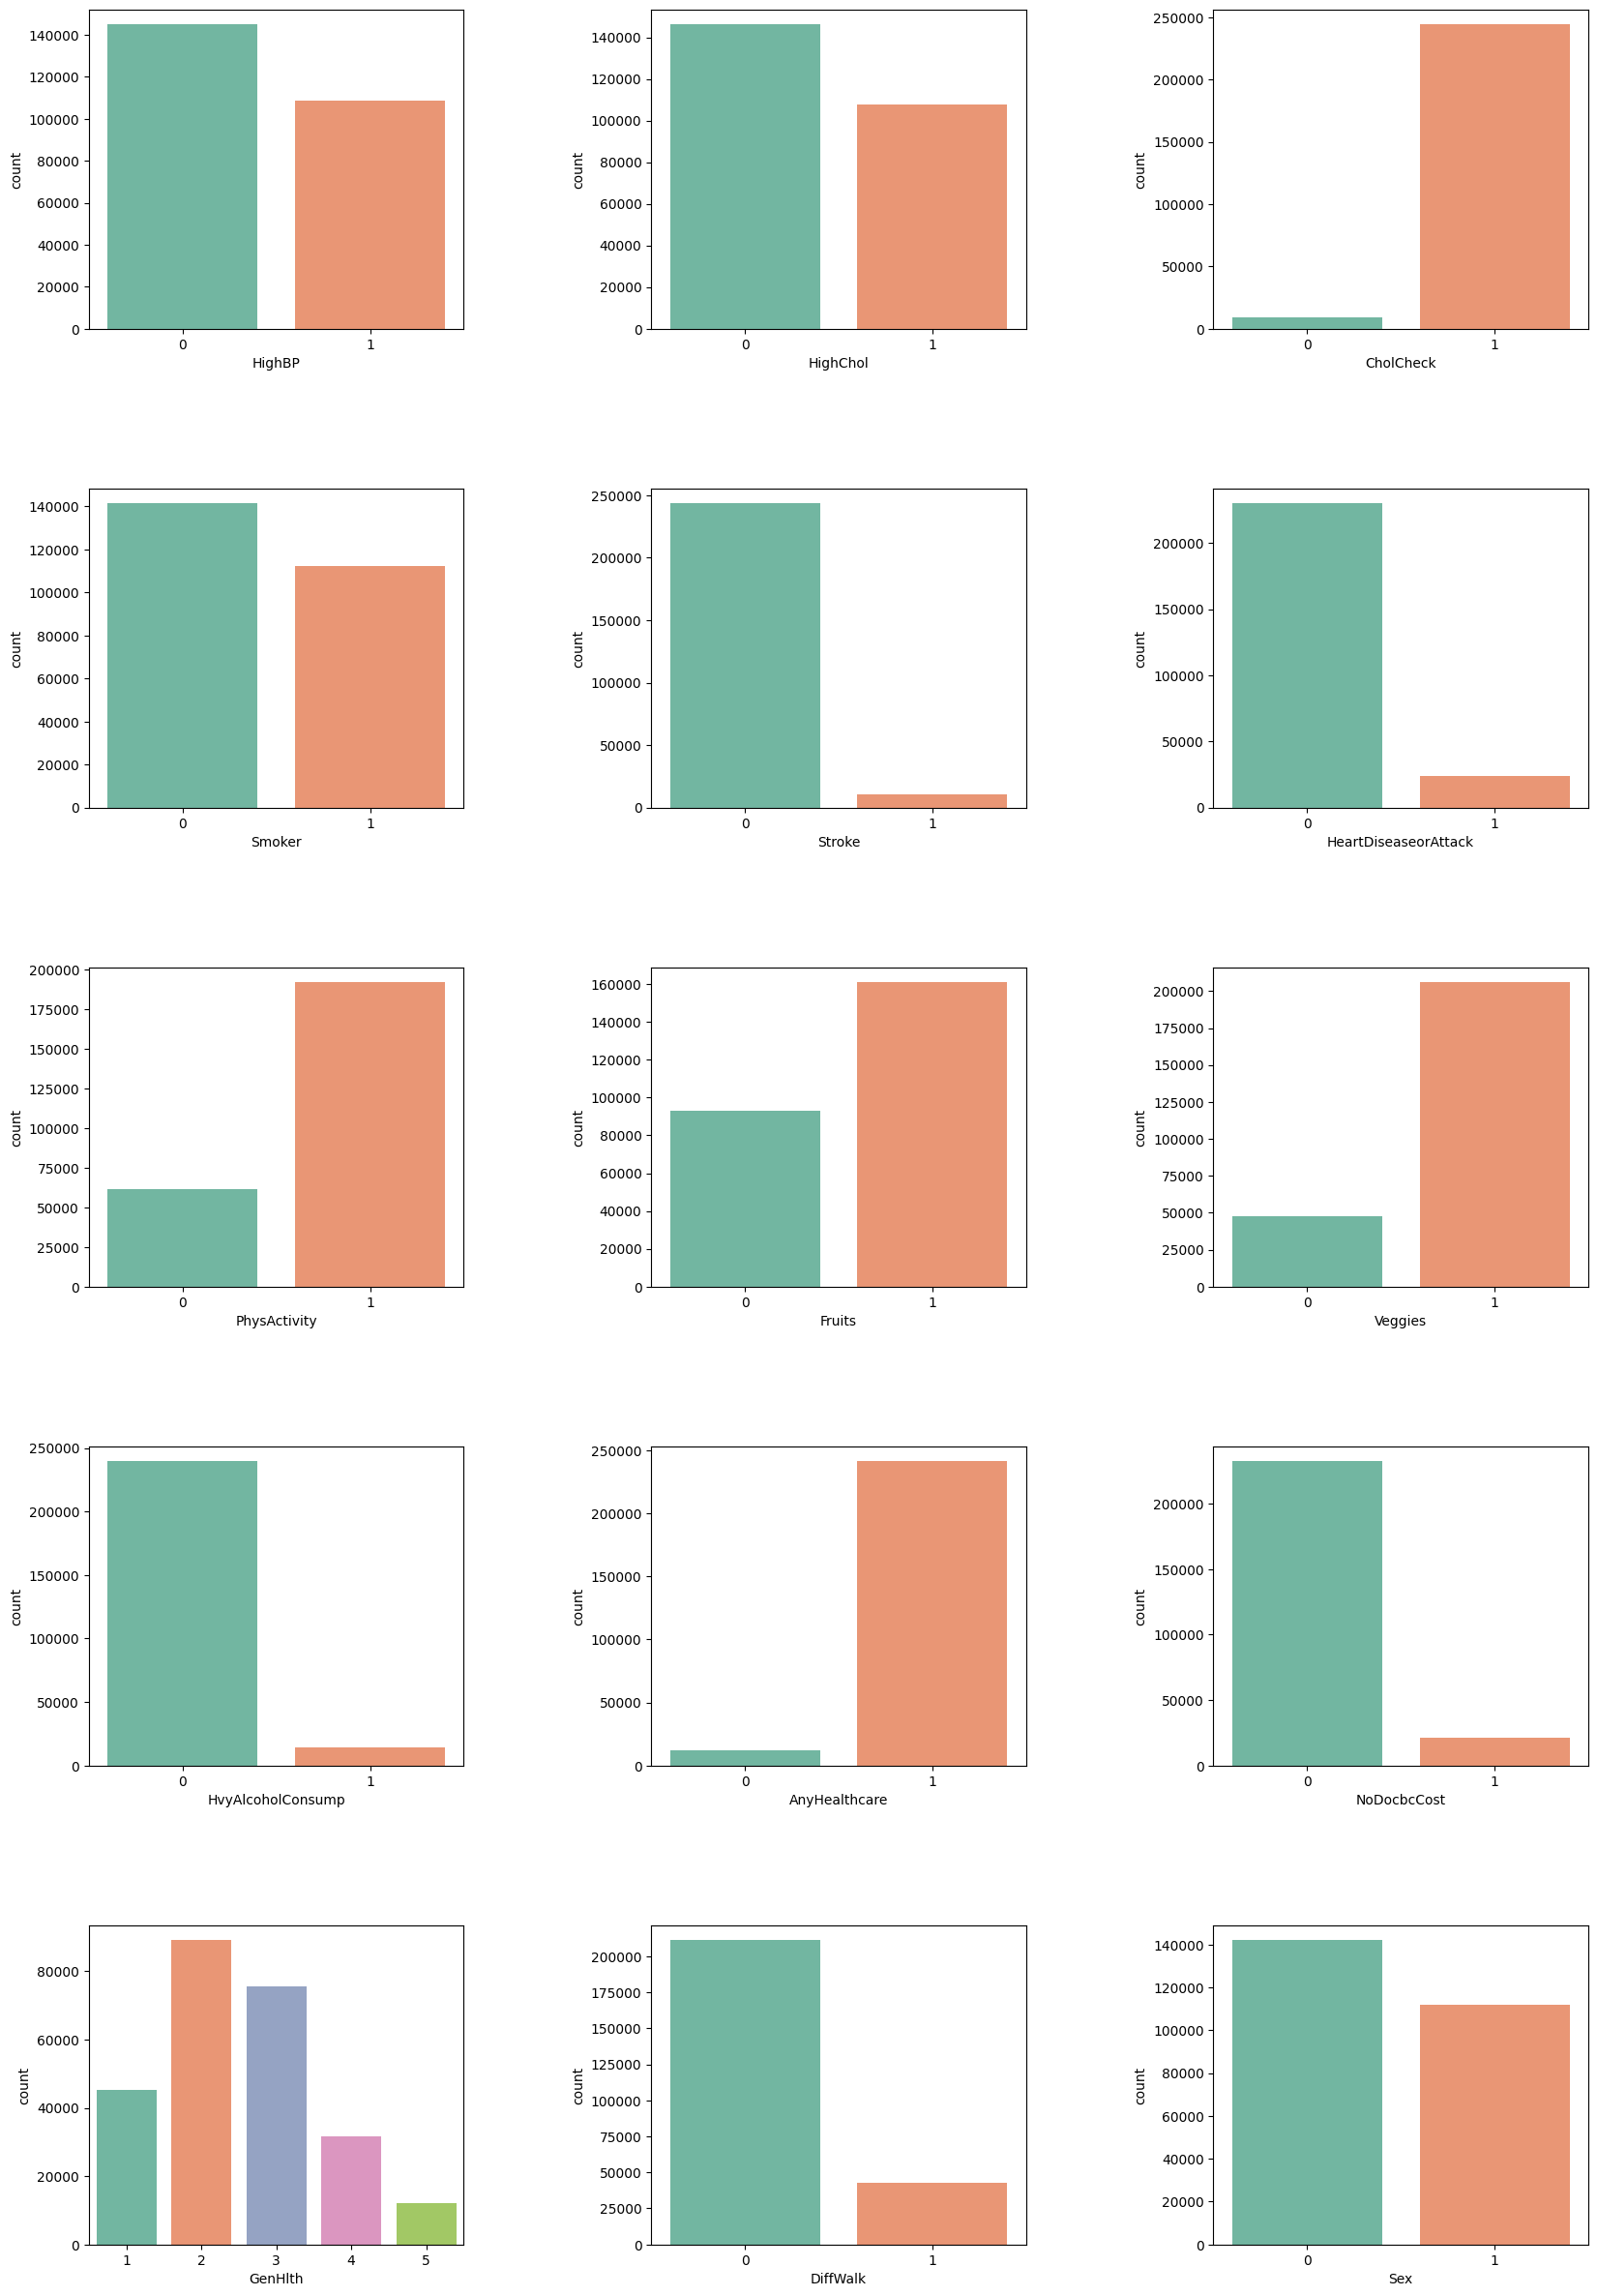

In [ ]:
li_col = [x for x in df.columns if x not in ["Diabetes_012", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(li_col, int(len(li_col)/3+0.5), figsize=(20, 30))


### Cholesterol check (CholCheck), Stroke, HeartDiseaseorAttack, heavy drinker (HvyAlcoholConsump), AnyHealthcare, NoDoctorCost, and DiffWalk are features having clear imbalanced results.

<Axes: xlabel='BMI', ylabel='Count'>

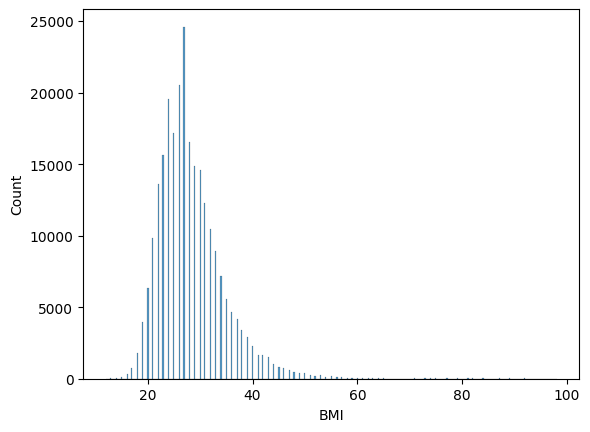

In [ ]:
# Plot for BMI

sns.histplot(x=df['BMI'])

### BMI is right-skewed with extreme right value 98

<Axes: xlabel='MentHlth', ylabel='count'>

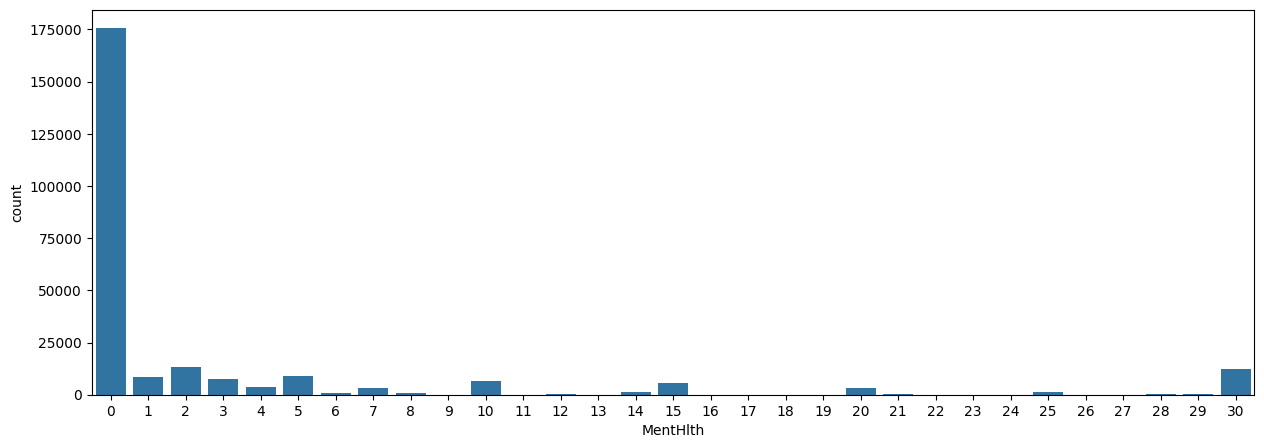

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='MentHlth', ax=ax)

<Axes: xlabel='PhysHlth', ylabel='count'>

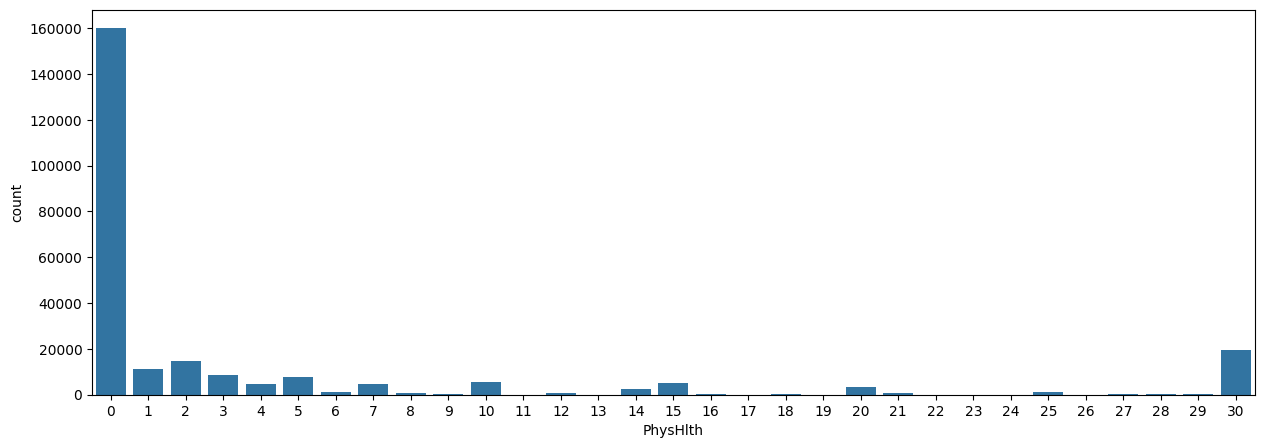

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='PhysHlth', ax=ax)

# **Data Preprocessing**

 - Binary Classes and Balanced Classes
 - Diabetes class 2 is grouped to class 1
 - Updated Classes are: 0 = NO Diabetes and 1 = Prediabetes + Diabetes

 - Downsampling
 - Imbalanced classes are solved by downsampling on class 0
 - Number of Class 0 value (39977) is randomly selected to match the same number of Class 1 value.

 - Define target and features


In [14]:
def data_preprocessing(df):
  # Retrieve the number of class 1 samples
  num_class_1 = len(df[df['Diabetes_012']==1])

  # Sampling and create new dataframe to contain the two balanced classes
  sample_0 = df[df['Diabetes_012']==0].sample(num_class_1, random_state=73)
  sample_1 = df[df['Diabetes_012']==1]
  df_downsampled = pd.concat([sample_0, sample_1], axis=0)
  return df_downsampled

## Define Features and Target

In [15]:
bal_df = data_preprocessing(df)
bal_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
179040,0,0,0,1,28,0,0,0,1,0,1,0,1,0,3,2,2,0,0,13,5,4
163381,0,0,1,1,42,0,0,0,1,0,0,0,0,1,3,10,30,1,0,5,2,3
128387,0,1,1,1,30,1,0,0,1,1,1,0,1,1,3,0,7,1,0,8,5,5
102254,0,0,0,1,28,1,0,0,1,1,0,1,1,0,2,0,0,0,1,6,5,8
231134,0,0,1,1,28,0,0,0,1,0,1,0,1,0,3,0,15,0,0,12,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253528,1,1,0,1,34,0,0,0,1,1,1,0,1,0,3,0,6,0,0,4,5,4
253529,1,1,0,1,32,1,0,0,1,0,1,0,1,0,2,0,2,0,1,9,6,7
253566,1,0,0,1,24,0,0,1,0,1,1,0,1,0,3,0,0,0,0,10,6,4
253664,1,0,1,1,29,1,0,0,0,0,0,0,1,0,3,0,0,0,0,6,6,4


In [28]:

def model_training (dataframe):
  fea = dataframe.drop(["Diabetes_012"], axis=1)
  tar = dataframe["Diabetes_012"]

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(fea, tar, test_size=0.3, random_state=73)

  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  scaler_train = StandardScaler().fit(X_train)

  # Create a new SVM classifier with the best parameters
  svm_classifier_best = SVC()

  # Train the classifier on the training data
  svm_classifier_best.fit(X_train_scaled, y_train)

  train_accuracy = svm_classifier_best.score(X_train_scaled, y_train)
  accuracy = svm_classifier_best.score(X_test_scaled, y_test)
  print("Training Accuracy:", train_accuracy)
  print("Validation/Test Set Accuracy:", accuracy)


  return model


In [29]:
model = model_training(bal_df)

Training Accuracy: 0.73916396729909
Validation/Test Set Accuracy: 0.6822598056854984


In [ ]:
# Saving my model in Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import os

In [ ]:
model_directory = "/content/drive/My Drive/ML_models"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)
    print(f"Directory '{model_directory}' was created.")

# Now specify the full path to save your model
model_path = os.path.join(model_directory, 'diabetes.pkl2')

with open(model_path, 'wb') as file:
    pickle.dump(svm_classifier_best, file)

model_path2 = os.path.join(model_directory, 'diabetes_scaler.pkl')
with open(model_path2, 'wb') as file2:
  pickle.dump(scaler, file2)

In [ ]:
print(classification_report(y_train, svm_classifier_best.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      3714
           1       0.67      0.63      0.65      3695

    accuracy                           0.66      7409
   macro avg       0.66      0.66      0.66      7409
weighted avg       0.66      0.66      0.66      7409

